## Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the
dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond
alternative with many of the same qualities as a diamond). The company is earning different profits on different prize
slots. You have to help the company in predicting the price for the stone on the bases of the details given in the
dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit
share. Also, provide them with the best 5 attributes that are most important.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
%matplotlib inline

### Importing Data

In [16]:
df1 = pd.read_csv("cubic_zirconia.csv")

### EDA

In [17]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [18]:
#Remove first column as it is just numbering
df1.drop("Unnamed: 0" , axis='columns', inplace=True)

In [19]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [20]:
df1.shape

(26967, 10)

In [21]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [23]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### unique values for categorical variables

In [24]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column,': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

cut :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


color :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


clarity :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Converting categorical to dummy variables

In [25]:
df1['cut'] = df1['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good':3, 'Premium': 4,'Ideal':5})
df1['color'] = df1['color'].replace({'D': 7, 'E': 6, 'F':5, 'G': 4,'H':3,'I':2,'J':1})
df1['clarity'] = df1['clarity'].replace({'FL':11, 'IF':10, 'VVS1':9, 'VVS2':8, 'VS1':7, 'VS2':6, 'SI1':5,'SI2':4, 'I1':3, 'I2':2, 'I3':1})

In [26]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


In [27]:
df1.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Imputing missing values 

In [28]:
# Are there any missing values ?
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [29]:
for column in df1.columns:
    if df1[column].dtype != 'object':
        mean = df1[column].mean()
        df1[column] = df1[column].fillna(mean)    
        
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Checking for duplicates

In [30]:
# Are there any duplicates ?
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [31]:
print('Before',df1.shape)
df1.drop_duplicates(inplace=True) 
print('After',df1.shape)

Before (26967, 10)
After (26933, 10)


### Correlation Plot

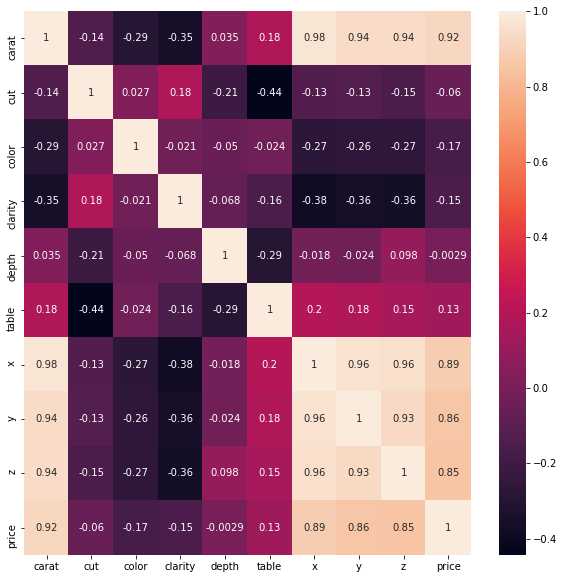

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Outlier Checks

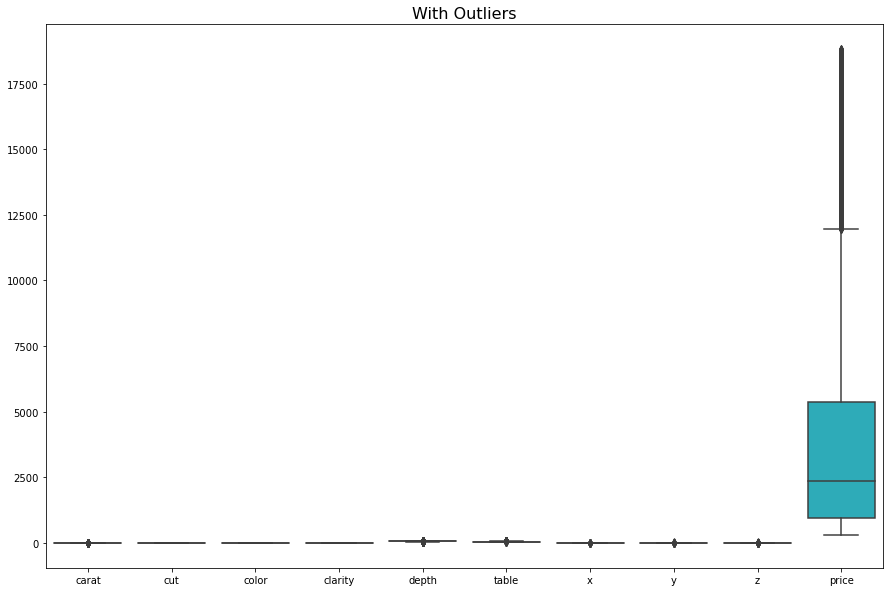

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df1)
plt.title('With Outliers',fontsize=16)
plt.show()

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
for column in df1.columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

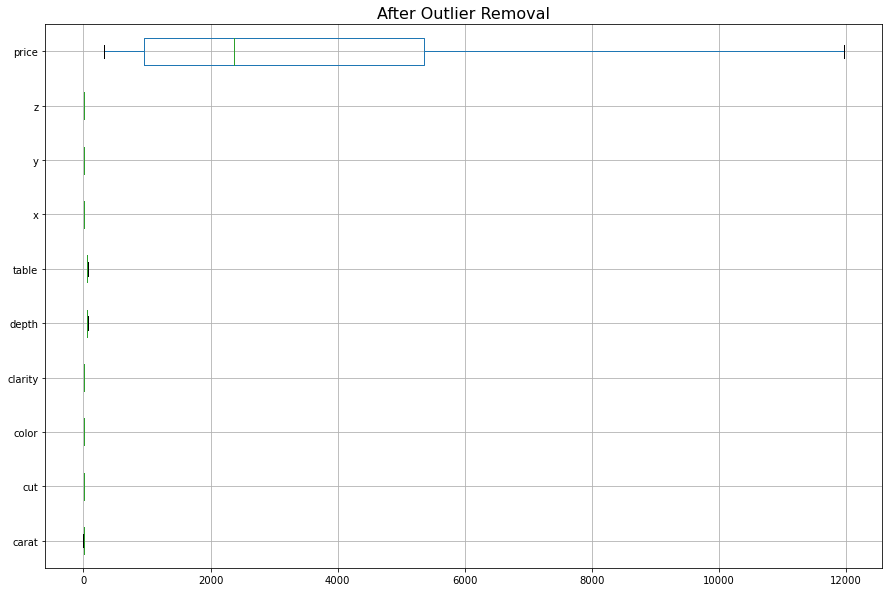

In [41]:
plt.figure(figsize=(15,10))
df1.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

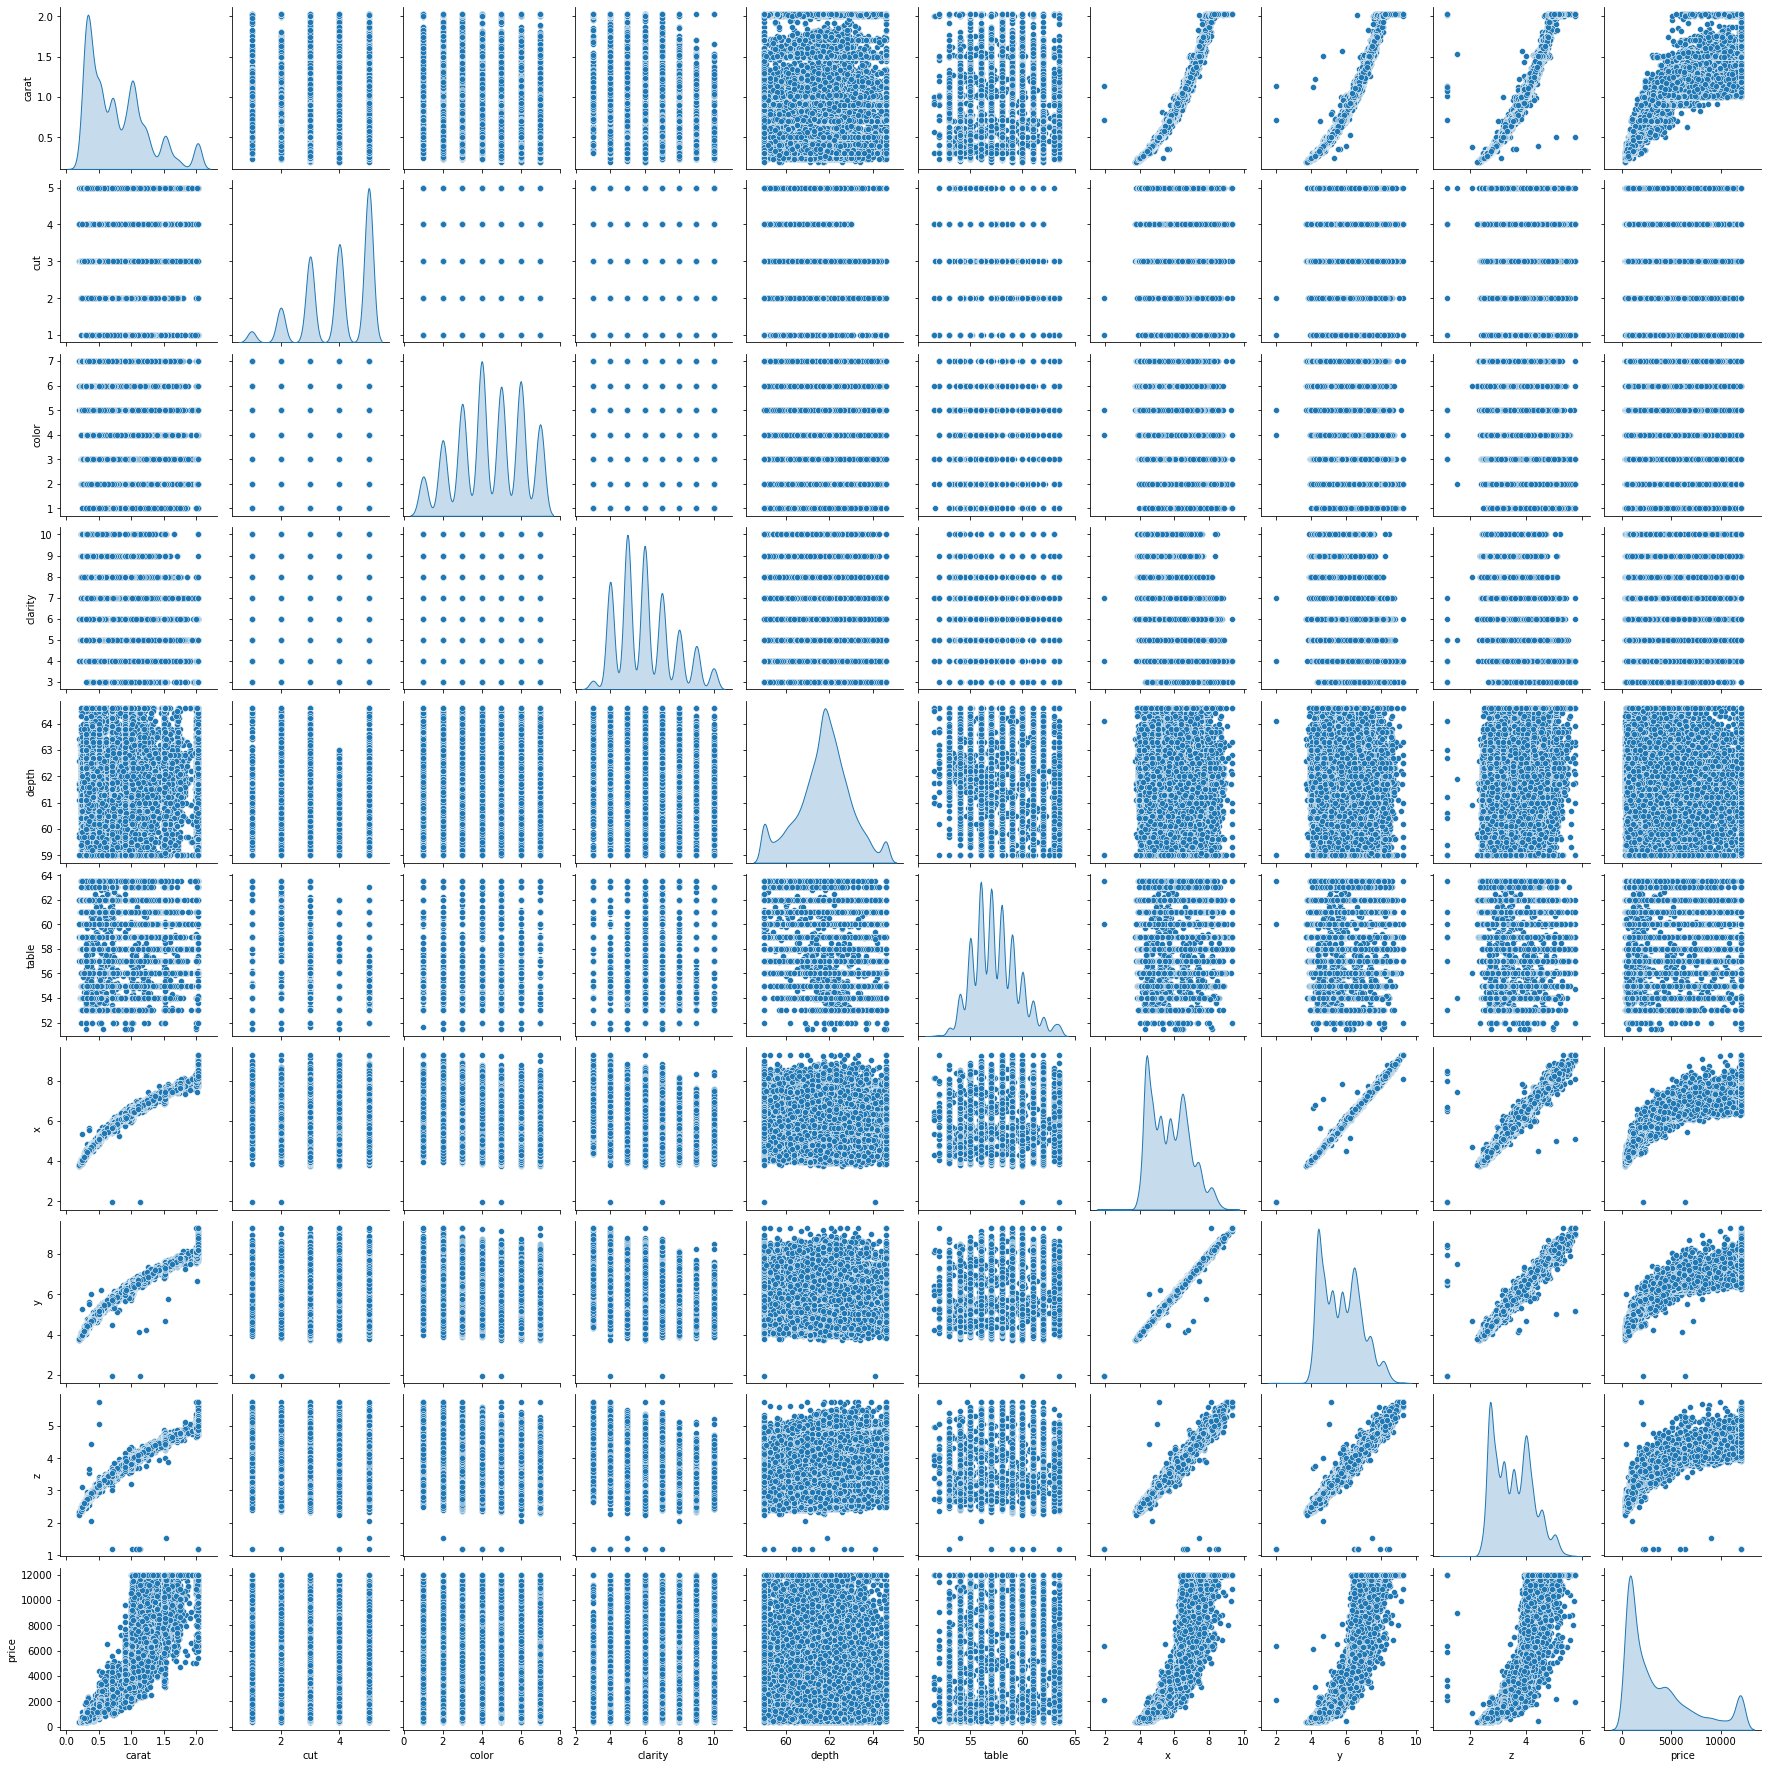

In [42]:
sns.pairplot(df1, diag_kind='kde')  
plt.show()

### Train-Test Split

In [43]:
# Copy all the predictor variables into X dataframe
X = df1.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df1[['price']]

In [44]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5.0,6.0,5.0,62.1,58.0,4.27,4.29,2.66
1,0.33,4.0,4.0,10.0,60.8,58.0,4.42,4.46,2.70
2,0.90,3.0,6.0,8.0,62.2,60.0,6.04,6.12,3.78
3,0.42,5.0,5.0,7.0,61.6,56.0,4.82,4.80,2.96
4,0.31,5.0,5.0,9.0,60.4,59.0,4.35,4.43,2.65


In [45]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Linear Regression Model

In [46]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8830.041263062529
The coefficient for cut is 110.85454043015258
The coefficient for color is 278.0046849488592
The coefficient for clarity is 440.5601072817637
The coefficient for depth is -7.410204433429766
The coefficient for table is -12.341576062261408
The coefficient for x is -1412.6208736112646
The coefficient for y is 1247.6796006371358
The coefficient for z is -312.824072016419


In [48]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4371.691649338302


In [49]:
# R square on training data
regression_model.score(X_train, y_train)

0.931167046085446

In [50]:
# R square on testing data
regression_model.score(X_test, y_test)

0.931211447014315

In [51]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

909.2450835680631

In [52]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.1428733156998

# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872
employees of a company. Among these employees, some opted for the package and some didn't. You have to help
the company in predicting whether an employee will opt for the package or not on the basis of the information given
in the data set. Also, find out the important factors on the basis of which the company will focus on particular
employees to sell their packages.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [54]:
df = pd.read_csv("Holiday_Package.csv")

### EDA

In [55]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [56]:
#Remove first column as it is just numbering
df.drop("Unnamed: 0" , axis='columns', inplace=True)

In [57]:
df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
7,yes,35987,32,8,0,2,no
8,no,41140,39,12,0,0,no
9,no,35826,43,11,0,2,no


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


### Check for duplicate data

In [59]:
dups = df.duplicated()
dups.sum()

0

### Geting unique counts of all Objects

In [60]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


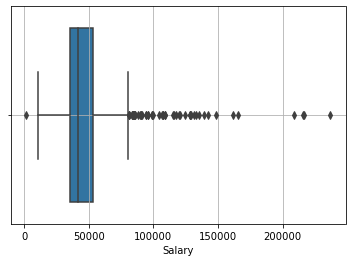

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


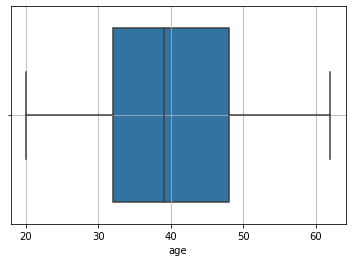

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


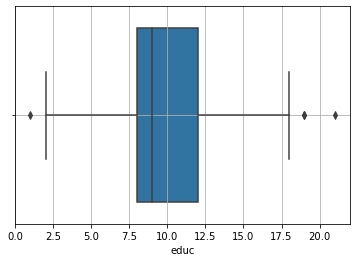

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


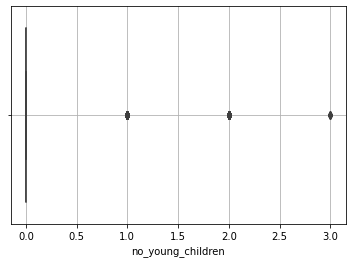

C:\Users\PrashKumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


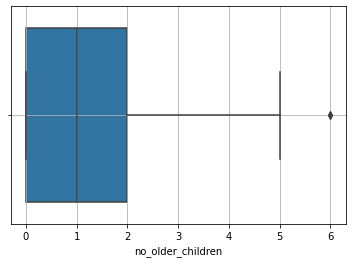

In [61]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [62]:
#We will treat the outliers for the 'Salary' variable only.
lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


### Checking for Correlations

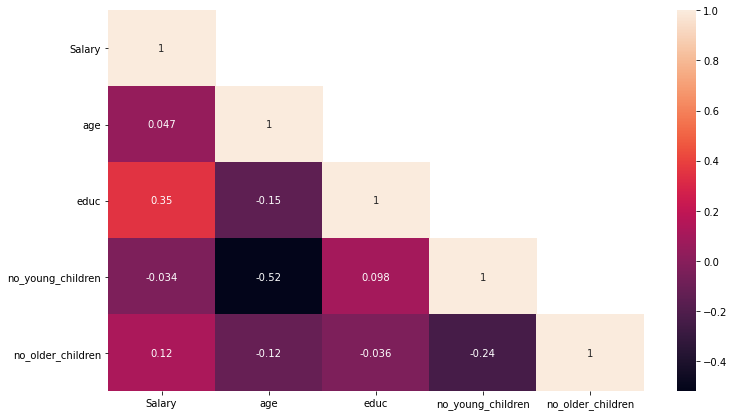

In [63]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

There is hardly any correlation between feature variables

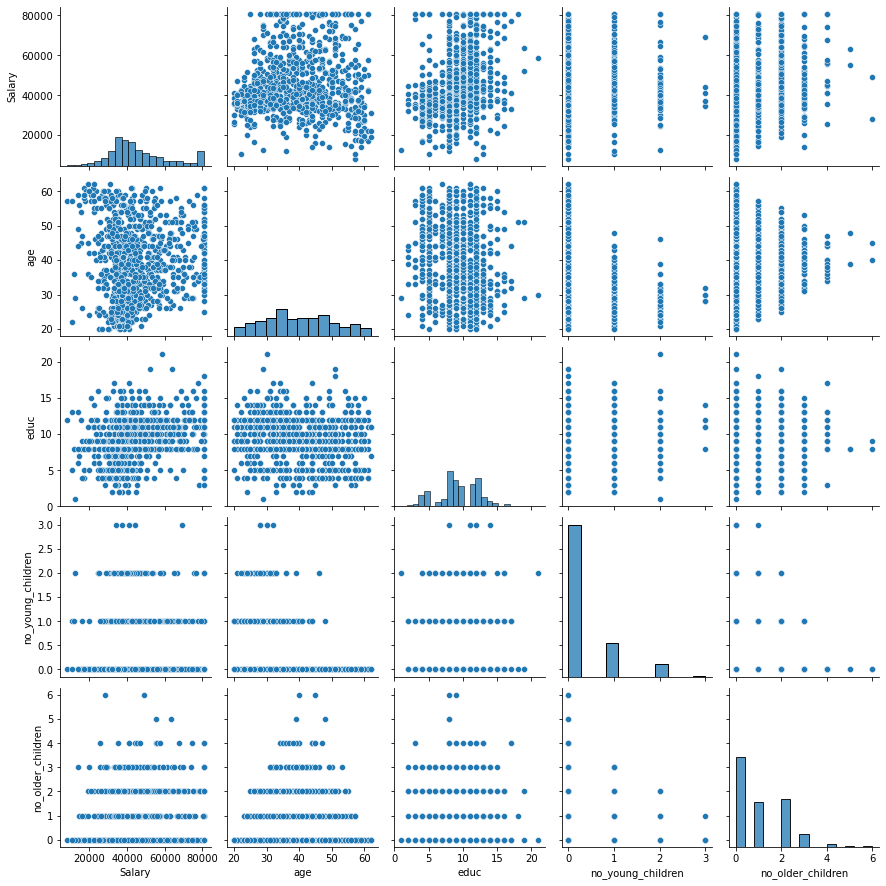

In [64]:
# Pairplot using sns
sns.pairplot(df ,diag_kind='hist');

### Converting Categorical to Numerical

In [65]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [66]:
df['Holliday_Package'] = df['Holliday_Package'].replace({'yes': 1, 'no': 0})
df['foreign'] = df['foreign'].replace({'yes': 1, 'no': 0})
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


### Train Test Split

In [67]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [68]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Logistic Regression Model

In [69]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, class_weight="balanced" )
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=2,
                   penalty='none', solver='newton-cg', verbose=True)

### Predicting on Training and Test dataset

In [73]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

### Model Evaluation

In [74]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6836065573770492

### AUC and ROC for the training and testing data 

AUC for the Training Data: 0.741
AUC for the Test Data: 0.704


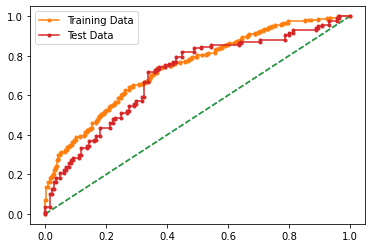

In [75]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [76]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6679389312977099

### Confusion Matrix for the training and testing data

NameError: name 'y_train' is not defined

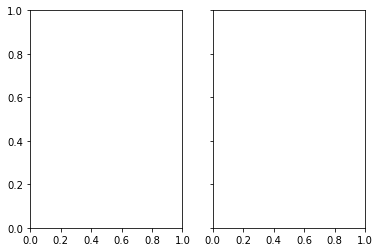

In [5]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [79]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.74      0.71       326
           1       0.67      0.62      0.65       284

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.68       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.68      0.69       145
           1       0.62      0.66      0.64       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262
 



## LDA Model

In [4]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [88]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6754098360655738

In [87]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6412213740458015

### Prediction

In [82]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)


### Training Data and Test Data Confusion Matrix Comparison

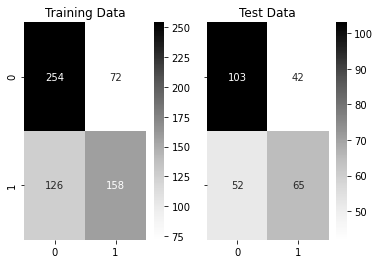

In [83]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [84]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



### Probability prediction for the training and test data

In [85]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.739
AUC for the Test Data: 0.703


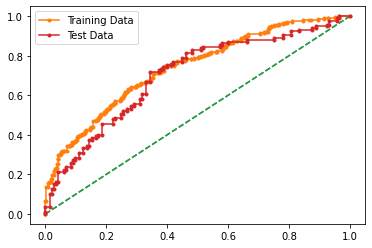

In [86]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()